# 「深層学習」読書会　〜第6章〜

<p style="text-align:center;font-size:150%;line-height:150%">2016/05/21 機械学習 名古屋 第4回勉強会</p>

## 第6章 畳込みニューラルネット

### 6.1 単純型細胞と複雑型細胞

後回し。  
《TODO: やるとしても言葉の説明だけ？》  
《TODO: 図を描くか？》

### 6.2 全体の構造

In [1]:
from graphviz import Digraph

In [2]:
fig_6_3 = Digraph("fig_6_3", format="svg")

fig_6_3.body.extend(['rankdir=LR'])

c1 = Digraph('cluster_1')
c1.body.append('style=filled')
c1.body.append('color=white')
c1.node_attr.update(shape='box', style='rounded,filled', color='white', penwidth='2')
c1.attr('edge', color="#737373")
c1.edges([('input', 'conv0'), ('conv0', 'conv1'), ('conv1', 'pooling1'), ('pooling1', 'lcm1')])
c1.node('input', 'input (image)', fillcolor="#b3ffff", color="#009999")
c1.node('conv0', 'convolution', fillcolor="#fb8072", color="#941305")
c1.node('conv1', 'convolution', fillcolor="#fb8072", color="#941305")
c1.node('pooling1', 'pooling', fillcolor="#80b1d3", color="#275372")
c1.node('lcm1', 'LCM', fillcolor="#eeeeee", color="#808080")

c2 = Digraph('cluster_2')
c2.body.append('style=filled')
c2.body.append('color=white')
c2.node_attr.update(shape='box', style='rounded,filled', color='white', penwidth='2')
c2.attr('edge', color="#737373")
c2.edges([('conv2', 'pooling2'), ('pooling2', 'fc1'), ('fc1', 'fc2'), ('fc2', 'softmax'), ('softmax', 'output')])
c2.node('conv2', 'convolution', fillcolor="#fb8072", color="#941305")
c2.node('pooling2', 'pooling', fillcolor="#80b1d3", color="#275372")
c2.node('fc1', 'fully-\nconnected', fillcolor="#ffffb3", color="#999900")
c2.node('fc2', 'fully-\nconnected', fillcolor="#ffffb3", color="#999900")
c2.node('softmax', 'softmax', fillcolor="#b3de69", color="#597d1c")
c2.node('output', 'output (label)', fillcolor="#b3ffff", color="#009999")

fig_6_3.subgraph(c1)
fig_6_3.subgraph(c2)

fig_6_3.attr('edge', color="#737373")

fig_6_3.edge('conv2', 'lcm1', dir="back", minlen="4")


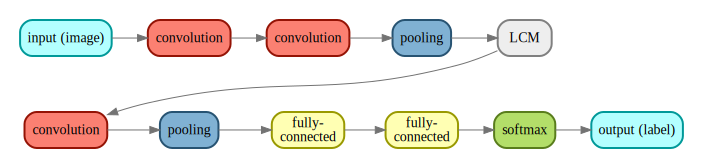

In [3]:
fig_6_3

In [4]:
fig_6_3_ja = Digraph("fig_6_3_ja", format="svg")

fig_6_3_ja.body.extend(['rankdir=LR'])

c1j = Digraph('cluster_1')
c1j.body.append('style=filled')
c1j.body.append('color=white')
c1j.node_attr.update(shape='box', style='rounded,filled', color='white', penwidth='2')
c1j.attr('edge', color="#737373")
c1j.edges([('input', 'conv0'), ('conv0', 'conv1'), ('conv1', 'pooling1'), ('pooling1', 'lcm1')])
c1j.node('input', '入力（画像）', fillcolor="#b3ffff", color="#009999")
c1j.node('conv0', '畳み込み', fillcolor="#fb8072", color="#941305")
c1j.node('conv1', '畳み込み', fillcolor="#fb8072", color="#941305")
c1j.node('pooling1', 'プーリング', fillcolor="#80b1d3", color="#275372")
c1j.node('lcm1', '正規化', fillcolor="#eeeeee", color="#808080")

c2j = Digraph('cluster_2')
c2j.body.append('style=filled')
c2j.body.append('color=white')
c2j.node_attr.update(shape='box', style='rounded,filled', color='white', penwidth='2')
c2j.attr('edge', color="#737373")
c2j.edges([('conv2', 'pooling2'), ('pooling2', 'fc1'), ('fc1', 'fc2'), ('fc2', 'softmax'), ('softmax', 'output')])
c2j.node('conv2', '畳み込み', fillcolor="#fb8072", color="#941305")
c2j.node('pooling2', 'プーリング', fillcolor="#80b1d3", color="#275372")
c2j.node('fc1', '全結合', fillcolor="#ffffb3", color="#999900")
c2j.node('fc2', '全結合', fillcolor="#ffffb3", color="#999900")
c2j.node('softmax', 'softmax', fillcolor="#b3de69", color="#597d1c")
c2j.node('output', '出力 (ラベル)', fillcolor="#b3ffff", color="#009999")

fig_6_3_ja.subgraph(c1j)
fig_6_3_ja.subgraph(c2j)

fig_6_3_ja.attr('edge', color="#737373")

fig_6_3_ja.edge('conv2', 'lcm1', dir="back", minlen="4")

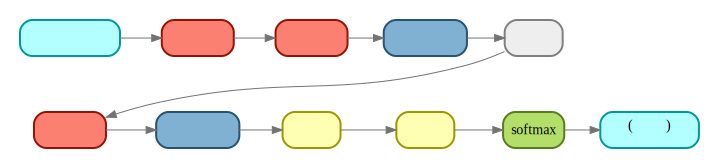

In [5]:
fig_6_3_ja

### 6.3 畳込み

In [2]:
import tensorflow as tf

#### 6.3.1 定義

+ $x_{ij}$: （入力の）画像の $(i, j)$ の画素値（$0 \le i, j \lt W$, $W$ は画像の縦及び横のサイズ（正方形と仮定））
+ $h_{pq}$: **フィルタ**画像の $(p, q)$ の画素値（$0 \le p, q \lt H$, $H$ はフィルタの縦及び横のサイズ（フィルタは正方形））

↓

$$
u_{ij} = \sum_{p=0}^{H-1}\sum_{q=0}^{H-1} x_{i+p,j+q}h_{pq}
$$

#### 6.3.2 畳込みの働き

《略》

※ 教科書 p.84 の 図6.4 参照。

#### 6.3.3 パディング

**パディング**：  
+ 出力画像が元の画像サイズと同じになるように、上下左右に追加する「ふち」。
+ 例：画像のサイズを $8 \times 8$、フィルタのサイズを $3 \times 3$ とする。  
  ⇒ 上下左右に 1px 分の「ふち」をつければ、出力サイズが $8 \times 8$ となる。
+ 追加した「ふち」の画素値は $0$ にする（**ゼロパディング**）のが一般的。
  + 出力画像のふちの付近が「暗く」なる傾向が出てしまう問題あり。

参考：**パディングなし**の場合  
+ 出力画像の縦および横のサイズが少しだけ小さくなる。
  + 例：画像を $8 \times 8$、フィルタを $3 \times 3$ とすると、出力は $6 \times 6$ になる。
+ ただし、元のデータのみを利用するので、画像の劣化が少なくなる。

#### 6.3.4 ストライド

**ストライド**：

+ ずらすサイズ $s$。
+ 出力サイズは（入力サイズの）約 $1/s$ となる。
  + 畳み込み層では通常、ストライドは $(1, 1)$ （大きくすると特徴を取りこぼす）
  + プーリング層では $(2, 2)$ 以上を指定することが一般的

### 6.4 畳込み層

+ 入力サイズ： $W \times W \times K$
  + $W$：画像（または前層の出力マップの各チャネル）の縦（および横）のサイズ
  + $K$：前層の出力チャネル数（前が入力画像の場合、$K=1$（グレースケール）または $K=3$（RGB画像）など）
+ フィルタサイズ： $H \times H \times K \times M$
  + $H$：1つのフィルタの縦（および横）のサイズ
  + $K$：入力サイズの $K$ に一致（＝チャネル数）
  + $M$：フィルタの数
+ ストライド：通常 $(1, 1)$
+ パディング：あり（＝出力の（縦および横の）サイズが入力サイズに一致）とすることが多い
+ 出力サイズ： $W \times W \times M$ （ストライド・パディングが↑の通りである場合）

+ $z^{(l-1)}_{ijk}$: 前層（または入力画像）の $k$ チャネルの $(i, j)$ 画素値（$0 \le i, j \lt W$、$0 \le k \lt K$）
+ $h_{pqkm}$: $m$番目 のフィルタの $k$ チャネルの $(p, q)$ 画素値（$0 \le p, q \lt H$, $0 \le m \lt M$）
+ $b_{ijm}$: $m$番目 のフィルタのバイアス（$b_{ijm} = b_m$ とすることが多い）
+ $f$: 活性化関数

↓

$$
\begin{eqnarray*}
u_{ijm} &=& \sum_{k=0}^{K-1}\sum_{p=0}^{H-1}\sum_{q=0}^{H-1} z^{(l-1)}_{i+p,j+q,k}h_{pqkm} + b_{ijm}\\
z^{(l)}_{ijm} &=& f(u_{ijm})
\end{eqnarray*}
$$

※ この $h_{pqkm}$ が、通常の（全結合型の）ニューラルネットの「重み」に相当。  
※ （この層においては）学習するということは、$h_{pqkm}$ および $b_{ijm} (= b_m)$ を最適化すること。

TensorFlow で書くと、こんな感じ（コードの一部）：

In [ ]:
# z1: shape が [*, W, W, K] の4次元 tensor
# weight_variable(): 指定したサイズの「重み」を定義する関数
# bias_variable(): 指定したサイズの「バイアス」を定義する関数
# f(): 活性化関数

h1 = weight_variable([H, H, K, M])
b1 = bias_variable([M])

u2 = tf.nn.conv2d(z1, h1, strides=[1, 1, 1, 1], padding='SAME') + b1
z2 = f(u2)


※ `strides=[X, w, h, X]` のうち、重要なのは真ん中の2つ（`w`, `h`）。この2つがストライドの「ずらすサイズ」。  
※ `padding='SAME'` は、「パディングあり（出力サイズが入力と同じ）」の意味。パディングなしにするには `padding='VALID'` と指定する。

### 6.5 プーリング層

+ 畳み込み層：
  + フィルタによりパターン認識・抽出を行う
  + 位置のずれに鈍感（少しでもずれると別のパターンと認識してしまう）
+ **プーリング層**：
  + 畳み込み層の位置感度を若干低下させ、ずれを吸収する（複雑型細胞のモデル）
  + 重み（パラメータ）は固定（＝学習の対象外）

+ 入力サイズ： $W \times W \times K$
  + $W$：縦（および横）のサイズ
  + $K$：チャネル数
+ プーリングサイズ： $H \times H$
  + $H$：正方形領域の一辺のサイズ
+ ストライド：$(s, s)$ ただし $1 \le s \le H$（$s \ge 2$ とするのが普通）
+ パディング：あり（＝出力の（縦および横の）サイズが入力サイズの $1/H$）とすることが多い
+ 出力サイズ：だいたい $(W/s) \times (W/s) \times K$

**最大プーリング**：
$$
u_{ijk} = \max_{(p,q \in P_{ij})} z_{pqk}
$$

**平均プーリング**：
$$
u_{ijk} = \frac{1}{H^2} \sum_{(p,q \in P_{ij})} z_{pqk}
$$

※ ただし  

+ $z_{pqk}$: 入力（前の層の出力）、$0 \le p, q \le W$、$0 \le k \lt K$
+ $P_{ij}$: 入力（前の層の出力）のある $H \times H$ サイズの部分領域（を表すインデックス）
+ $u_{ijk}$: 出力

※ プーリング層では通常、活性化関数を適用しない（$z^{(l)}_{ijk} = u_{ijk}$）

TensorFlow で書くと、こんな感じ（コードの一部）：

In [ ]:
# z1: shape が [*, W, W, K] の4次元 tensor

# 最大プーリング
z2 = tf.nn.max_pool(x, ksize=[1, H, H, 1], strides=[1, s, s, 1], padding='SAME')

# 平均プーリング
z2 = tf.nn.avg_pool(x, ksize=[1, H, H, 1], strides=[1, s, s, 1], padding='SAME')


### 6.6 正規化層

おさらい（[3.6.1](http://antimon2.github.io/MLNGY_201604/slides/Chapter3_StochasticGradientDescent.slides.html#/7/1)）：

> **正規化**（**normalization**）（もしくは**標準化**（**standardization**））：  
> データの平均を0に（および分散を1に）なるよう変換すること。
> データに偏りがある場合に実行する（詳細略）。

**正規化層**：  
正規化を入力データに対して行うのではなく、画像1枚1枚に対して行う。  
プーリング層と同様、重み（パラメータ）は固定（＝学習の対象外）。

**局所反応正規化**：  
TensorFlow に用意されている、正規化層を形成する仕組み。  
（この書籍で説明されている 局所コントラスト正規化 と少し違う。代わりに利用出来る）  
利用の仕方は次のような感じ（例）：

In [ ]:
# z1: shape が [*, W, W, K] の4次元 tensor

# 局所反応正規化
z2 = tf.nn.local_response_normalization(z1, 4, bias=1.0, alpha=1.0, beta=0.5)
# z2 = tf.nn.lrn(z1, 4, bias=1.0, alpha=1.0, beta=0.5) # ←でもOK


※ MNIST（手書き数字認識）では普通利用しない（元々 0.0〜1.0 のグレースケールでデータのばらつきがないため不要）

※ **6.6.1 局所コントラスト正規化**、**6.6.2 単一チャネル画像の正規化**、**6.6.3 多チャネル画像の正規化** は略

### 6.7 勾配の計算

《略》

### 6.8 実例

《略》